<a href="https://colab.research.google.com/github/ArtemKarDev/Kaggle/blob/main/EDA_Netflix_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Netflix - развивающийся популярный стриминговый сервис. 

Проведем разведочный анализ данных с использованием интерактивной библиотеки визулизации данных - Plotly. <br>
Построим рекомендательную систему на основе описаний к фильму

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter

In [2]:
! pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 116 kB/s 


Загрузил датасет с https://www.kaggle.com/datasets/shivamb/netflix-shows
к себе на google-диск 

In [3]:
# загружаем датасет в ноутбус с моего google-диска
!wget 'https://drive.google.com/uc?id=1JscRWVxO3DyBBBBr21fpeRHeUcmN5yhL' -O netflix_titles.csv


--2022-08-02 20:13:27--  https://drive.google.com/uc?id=1JscRWVxO3DyBBBBr21fpeRHeUcmN5yhL
Resolving drive.google.com (drive.google.com)... 142.251.120.101, 142.251.120.100, 142.251.120.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.120.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-14-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2alr4bkogrghjfpphj7n09hmn6lm6ncm/1659471150000/00838955718561688027/*/1JscRWVxO3DyBBBBr21fpeRHeUcmN5yhL?uuid=8f6c34be-68c0-4ffc-8589-fab1a41bb084 [following]
--2022-08-02 20:13:28--  https://doc-08-14-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2alr4bkogrghjfpphj7n09hmn6lm6ncm/1659471150000/00838955718561688027/*/1JscRWVxO3DyBBBBr21fpeRHeUcmN5yhL?uuid=8f6c34be-68c0-4ffc-8589-fab1a41bb084
Resolving doc-08-14-docs.googleusercontent.com (doc-08-14-docs.googleusercontent.com)... 74.125.129.132, 2607:f8b0:4001:c15::84
Connecting to do

In [4]:
netflix_overall = pd.read_csv('netflix_titles.csv')
netflix_overall.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8486,s8487,Movie,The Ring,Gore Verbinski,"Naomi Watts, Martin Henderson, David Dorfman, ...",United States,"January 1, 2020",2002,PG-13,116 min,"Horror Movies, Thrillers",A reporter watches a video that supposedly set...
4315,s4316,Movie,5 Star Christmas,Marco Risi,"Massimo Ghini, Ricky Memphis, Martina Stella, ...",Italy,"December 7, 2018",2018,TV-14,96 min,"Comedies, International Movies",When the Italian prime minister meets his love...
6913,s6914,Movie,Hamburger Hill,John Irvin,"Anthony Barille, Michael Boatman, Don Cheadle,...",United States,"November 23, 2019",1987,R,110 min,"Action & Adventure, Dramas",The Vietnam War's horrors come brutally to lif...
350,s351,Movie,Space Cowboys,Clint Eastwood,"Clint Eastwood, Tommy Lee Jones, Donald Suther...",United States,"August 1, 2021",2000,PG-13,130 min,"Action & Adventure, Dramas, Sci-Fi & Fantasy",A retired engineer agrees to help NASA prevent...
6829,s6830,Movie,Garuda in My Heart 2,Rudy Soedjarwo,"Emir Mahira, Aldo Tansani, Maudy Koesnaedi, Ra...",Indonesia,"November 30, 2018",2011,TV-PG,95 min,"Children & Family Movies, Dramas, Sports Movies",A young soccer player sets out to prove he can...
5303,s5304,Movie,Manoranjan,Shammi Kapoor,"Sanjeev Kumar, Zeenat Aman, Shammi Kapoor, Dev...",India,"September 1, 2017",1974,TV-14,162 min,"Comedies, International Movies, Music & Musicals","After getting fired, a police officer connects..."
8107,s8108,TV Show,Strong Girl Bong-soon,NaN,"Park Bo-young, Park Hyung-sik, Ji Soo, Shim Hy...",South Korea,"November 24, 2019",2017,TV-14,1 Season,"Crime TV Shows, International TV Shows, Korean...","Born with supernatural strength, Bong-soon fig..."
1117,s1118,Movie,Ibrahim a Fate to Define,Lina Al Abed,NaN,"Lebanon, Palestine, Denmark, Qatar","April 1, 2021",2019,TV-PG,75 min,"Documentaries, International Movies","Raised in a quiet home, Lina searches for answ..."
6338,s6339,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...","France, Belgium, Spain","August 26, 2016",2013,NC-17,180 min,"Dramas, Independent Movies, International Movies","Determined to fall in love, 15-year-old Adele ..."
5575,s5576,TV Show,Cheer Squad,NaN,NaN,United States,"March 14, 2017",2016,TV-PG,1 Season,"Reality TV, Teen TV Shows","Follow the Great White Sharks, a world-champio..."


In [5]:
netflix_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


наблюдаем наличие пропусков в некоторых колонках, но для разведки это не кретично.

In [6]:
netflix_shows = netflix_overall[netflix_overall['type'] == 'TV Show'].copy()

netflix_movie = netflix_overall[netflix_overall['type'] == 'Movie'].copy()

In [7]:
import plotly.io as pio
pio.renderers.default = "png"
png_renderer = pio.renderers["png"]

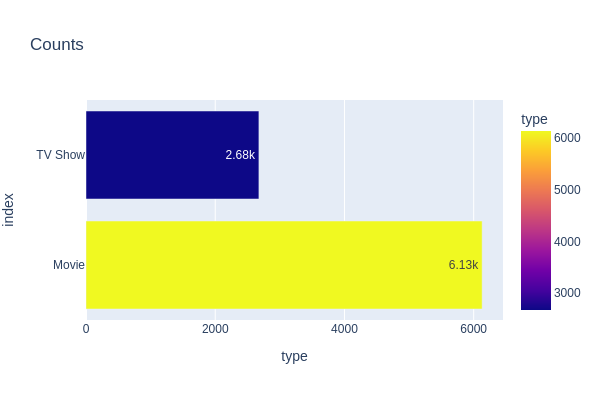

In [8]:
netflix_counts = netflix_overall['type'].value_counts()

fig = px.bar(netflix_counts, x="type", color='type', title="Counts", text_auto='.3s')
fig.update_layout(autosize=False, width=600, height=400)
fig.show()


Количество фильмов на Netflix больше чем сериалов более чем в 2 раза

### Длительность видеоконтента

In [9]:
topdirs = pd.value_counts(netflix_overall['duration'])
topdirs.head(10)

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
97 min        146
93 min        146
91 min        144
95 min        137
96 min        130
Name: duration, dtype: int64

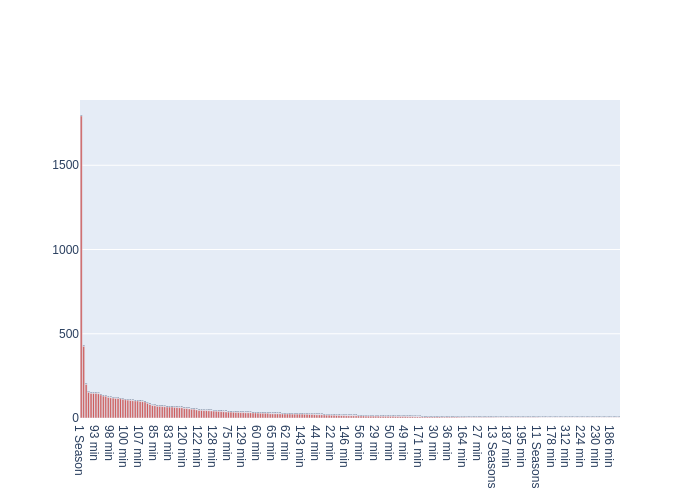

In [10]:
from plotly import graph_objects as go

fig = go.Figure([ 
      go.Bar(x=topdirs.index, 
             y=topdirs.values, 
             text=topdirs.values, 
             marker_color='indianred'
             ) 
      ])

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show('png')

Длительность в таблице указана в текстовом формате. Чаще всего указывается длительность - 'Season', тоесть Сезон - для твшоу(сериалов). но мы же знаем что фильмов больше, да - но длительность фильмов очень сильно вариативна.

# Анализ фильмов

## Какой месяц, самый перспективный для релиза контента?
вычислим месяц с наименьшим количеством публикуемого контента - для наименьшей конкуренции за зрителя

In [11]:
# проверим есть ли пропуски в датах публикации фильма
netflix_overall.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
# дропнем записи с пустой датой публикации
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date.isna().sum()

date_added    0
dtype: int64

In [13]:
# посмотрим что получилось
netflix_date.sample(5)

,date_added
8533,"January 22, 2018"
5405,"July 1, 2017"
6587,"July 1, 2017"
7828,"April 1, 2018"
3589,"August 15, 2019"


из этой записи необходимо выделить год и месяц - добавим их в новые столбцы

In [14]:
netflix_date['year'] = netflix_date['date_added'].apply(lambda x: x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x: x.lstrip().split(' ')[0])
netflix_date.head()

,date_added,year,month
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September
5,"September 24, 2021",2021,September


In [15]:
# посмотрим на самые ранние добавления фильмов
netflix_date.sort_values(by=['year','month']).head()

,date_added,year,month
6611,"February 4, 2008",2008,February
5940,"August 2, 2013",2013,August
7112,"March 31, 2013",2013,March
6885,"October 8, 2013",2013,October
7908,"October 14, 2013",2013,October


Интересно - между первой и второй публикацией фильмов 5 лет - видимо в этот период пуликовали только сериалы.

In [16]:
# для сортировки по месяцу сделаем споком месяцев
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] #[::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
January,0.0,0.0,0.0,0.0,28.0,14.0,24.0,37.0,53.0,36.0
February,1.0,0.0,1.0,1.0,6.0,17.0,24.0,45.0,42.0,44.0
March,0.0,1.0,0.0,2.0,3.0,38.0,35.0,53.0,44.0,37.0
April,0.0,0.0,1.0,4.0,8.0,27.0,28.0,43.0,50.0,53.0
May,0.0,0.0,0.0,1.0,4.0,23.0,27.0,48.0,52.0,38.0
June,0.0,0.0,0.0,2.0,7.0,29.0,28.0,46.0,41.0,83.0
July,0.0,0.0,0.0,2.0,9.0,34.0,27.0,59.0,43.0,88.0
August,0.0,1.0,0.0,0.0,11.0,38.0,34.0,44.0,47.0,61.0
September,0.0,1.0,0.0,1.0,19.0,32.0,43.0,37.0,53.0,65.0


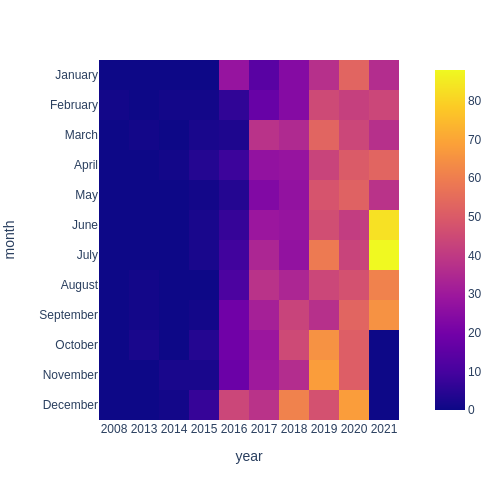

In [17]:
fig = px.imshow(df,width=500, height=500)
fig.show('png')

С помощью plotly  очень просто визуализировать. Всё параметры применилиь автоматически - видим по самой яркой точке - июль 2021го самый "жаркий" месяц по публикациям фильмов.<br>
Но нам наиболее интересен наоборот самый холодный месяц - например январь несколько лет подряд в этот месяц наименьшее количество публикаций, но в связи с праздниками и длинными ввыходнымидолжно быть наибольшее количество просмотров. Но в США с 3го января уже начинают работать. Будем целиться на Российский сегмент зрителей.

## Рейтинги фильмов


исследуем взрасной рейтинг фильмов

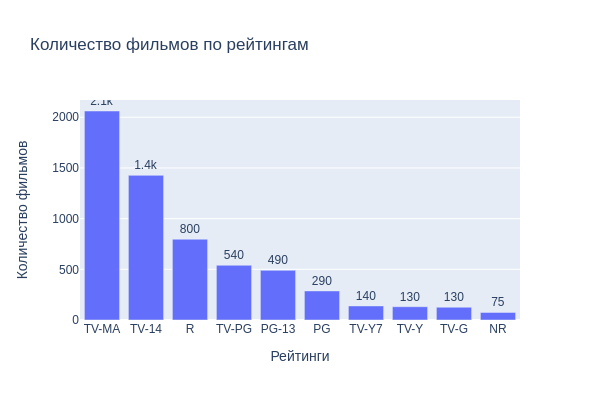

In [18]:
fig = go.Figure([ 
      go.Bar(y=netflix_movie['rating'].value_counts(), 
             x=netflix_movie['rating'].value_counts().index[:10], 
             text=netflix_movie['rating'].value_counts().values
             ) 
      ])

fig.update_layout(#legend_orientation="h",
                  #legend=dict(x=.5, xanchor="center"),
                  title="Количество фильмов по рейтингам",
                  xaxis_title="Рейтинги",
                  yaxis_title="Количество фильмов",
                  #margin=dict(l=0, r=0, t=30, b=0),
                  width=600, height=400)

fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='outside')
fig.show('png')

1. ТV-МА - Самая большая группа. Такой рейтинг дается фильмам только для взрослой аудитории.
2. ТV-14 - Вторая группа по величине. Контент фильма с таким рейтингом не подходит для детей младше 14 лет.
3. R - Фильмы не подходят для просмотра детям до 17 лет.

## Анализ года выпуска фильма

In [19]:
df_release = netflix_movie['release_year'].value_counts()[:15]

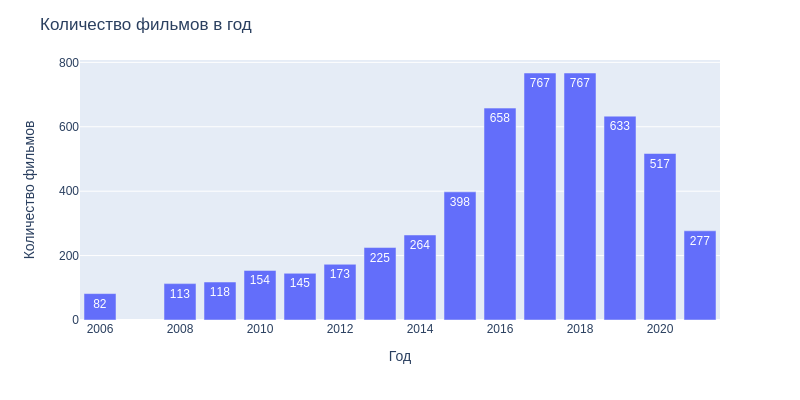

In [20]:
fig = px.bar(y=df_release.values, 
             x=df_release.index, 
             text=df_release.values)
fig.update_layout(title="Количество фильмов в год",
                  xaxis_title="Год",
                  yaxis_title="Количество фильмов",
                  width=800, height=400)
fig.show('png')

2017 и 2018 самый частый год выпуска фильмов

## Топ 10 стран по выпуску фильмов

In [21]:
#  проверим на пропуски 
netflix_movie.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

в колонке "страна" - есть пропуски  - но  не будем избовляться от этих записей - заполним значением Unknow

In [22]:
netflix_movie['country'].fillna("Unknow", inplace=True)
netflix_movie.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country           0
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [23]:
netflix_movie['country'].value_counts()

United States                            2058
India                                     893
Unknow                                    440
United Kingdom                            206
Canada                                    122
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: country, Length: 652, dtype: int64

В некоторых записях есть перечень стран учавствовавших в создании фильма - 

In [24]:
# функция для получения количества упоминаний 

def get_counts(data):    # соберем все записи из колонки и передаём списком в функцию
  lst = []
  
  for i in data:           # пройдемся по этому списку
    i = list(i.split(',')) # разделим по запятым
    for j in i:
      lst.append(j.replace(' ',''))  # уберем пробелы если есть
      # for k in lst:   # теперь пройдемся по разделенным записям
      #   if k in list(l.keys()):  # и будем добавлять или увеличивать счетчик при наличии страны в словаре
      #       l[k] += 1
      #   else:
      #       l[k] = 1
  l = Counter(lst)
  return sorted(l.items(), key=lambda item: l[item[0]], reverse=True)


In [25]:
  # функция для визуализации данных
def get_graph_counts(data, title,xlabel,ylabel):

    names = [name for name, values in data]
    values = [values for name, values in data]

    fig = px.bar(x=names, 
                y=values, 
                text=values)
    fig.update_layout(title=title,
                      xaxis_title=xlabel,
                      yaxis_title=ylabel,
                      width=800, height=400)
    fig.show('png')

In [26]:
countries_fin = get_counts(list(netflix_movie['country']))[:10]
countries_fin

[('UnitedStates', 2752),
 ('India', 962),
 ('UnitedKingdom', 534),
 ('Unknow', 440),
 ('Canada', 319),
 ('France', 303),
 ('Germany', 182),
 ('Spain', 171),
 ('Japan', 119),
 ('China', 114)]

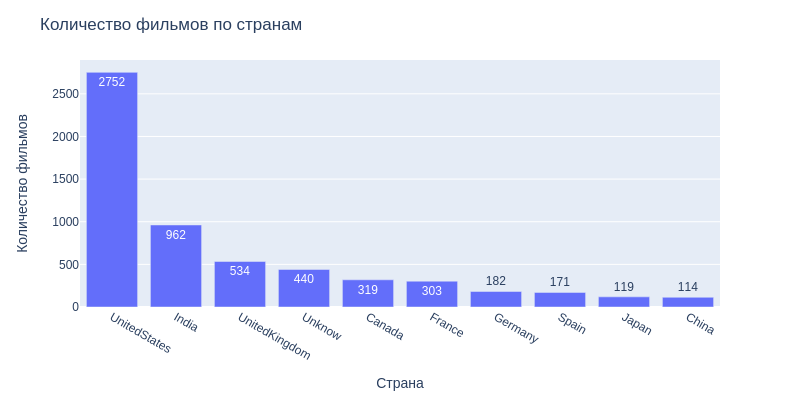

In [27]:
get_graph_counts(countries_fin, "Количество фильмов по странам", "Страна", "Количество фильмов")

## Анализ продолжительноси фильмов


In [28]:
netflix_movie['duration'].value_counts().head()

90 min    152
94 min    146
93 min    146
97 min    146
91 min    144
Name: duration, dtype: int64

In [29]:
netflix_movie[netflix_movie['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


есть несколько пропусков заполним их модой

In [30]:
mode_min = netflix_movie['duration'].mode()
netflix_movie.loc[netflix_movie['duration'].isna(), "duration"] = mode_min[0]

преобразуем тип значений для отрисовки частотности

In [31]:
# удалим слово min
netflix_movie['duration'] = netflix_movie['duration'].str.replace(' min', '')
# оставшиеся цифры переведем в int
netflix_movie['duration'] = netflix_movie['duration'].astype(int)
netflix_movie['duration']

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6131, dtype: int64

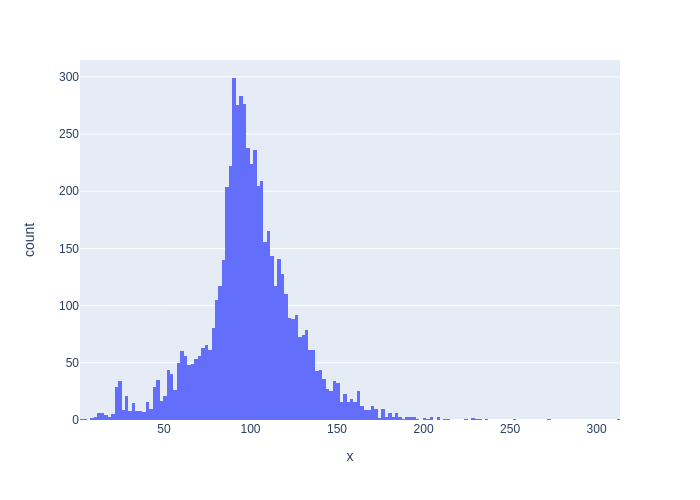

In [32]:
fig = px.histogram(x=netflix_movie['duration'])
fig.show('png')

Большинство фильмов имеют длительность от 75 до 120 минут

## Анализ жанров фильмов

In [33]:
netflix_movie['listed_in'].sample(10)

5039                                    Stand-Up Comedy
8359                           Children & Family Movies
7137                    International Movies, Thrillers
7474                         Dramas, Independent Movies
1775                  Horror Movies, Independent Movies
6999                Horror Movies, International Movies
6257                  Comedies, Dramas, Romantic Movies
728                                       Horror Movies
688     Comedies, International Movies, Romantic Movies
5999                         Dramas, Independent Movies
Name: listed_in, dtype: object

Посчитаем упоминания всех жанров 

In [34]:
genres = get_counts(list(netflix_movie['listed_in']))[:10]

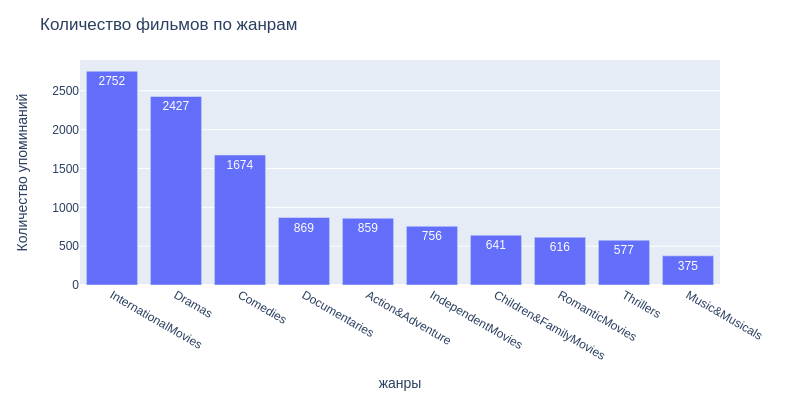

In [35]:
get_graph_counts(genres, "Количество фильмов по жанрам", "жанры", "Количество упоминаний")

#Анализ сериалов

###Анализ стран, выпускающих сериалы

In [36]:
netflix_shows['country'].isna().sum()

391

In [37]:
netflix_shows['country'].fillna('Unknow', inplace=True)

In [38]:
netflix_shows['country'].value_counts()

United States                                    760
Unknow                                           391
United Kingdom                                   213
Japan                                            169
South Korea                                      158
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: country, Length: 197, dtype: int64

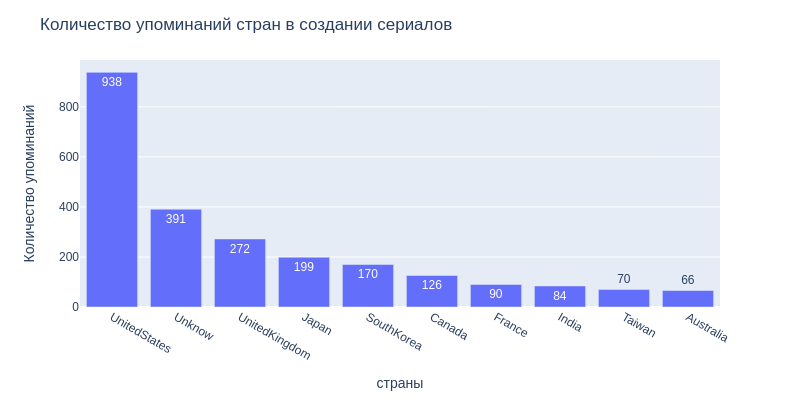

In [39]:
countries = get_counts(list(netflix_shows['country']))[:10]
get_graph_counts(countries, "Количество упоминаний стран в создании сериалов", "страны", "Количество упоминаний")

Индия со второго места по фильмам ушла на 8 место по сериалам

### Сериалы с большим количеством сезонов,

для этого возьмем заголовок и длительность

In [40]:
features = ['title','duration']
durations = netflix_shows[features].copy()
durations[:5]

,title,duration
1,Blood & Water,2 Seasons
2,Ganglands,1 Season
3,Jailbirds New Orleans,1 Season
4,Kota Factory,2 Seasons
5,Midnight Mass,1 Season


Создадим функцию для перевода количества в цифровой тип

In [41]:
def get_int_seasons(text):
    text = text.replace(' Season','')  # очищаем от слов и букв
    text = text.replace('s','')
    number = int(text)
    return number

durations['no_of_seasons'] = durations['duration'].apply(lambda x: get_int_seasons(x))
durations.head(5)

,title,duration,no_of_seasons
1,Blood & Water,2 Seasons,2
2,Ganglands,1 Season,1
3,Jailbirds New Orleans,1 Season,1
4,Kota Factory,2 Seasons,2
5,Midnight Mass,1 Season,1


теперь подготовим данные для передачи в функцию отрисовки

In [42]:
t = ['title', 'no_of_seasons' ]
top = durations[t]

top = top.sort_values(by='no_of_seasons', ascending=False)

In [43]:
top = durations[t].sort_values(by='no_of_seasons', ascending=False).set_index('title')[:20].to_dict()

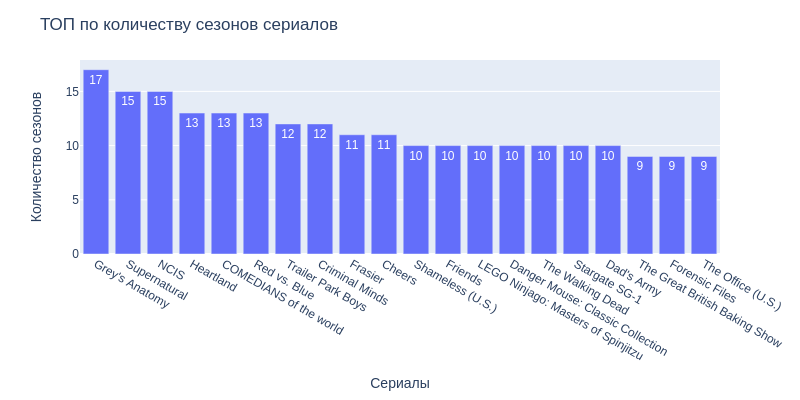

In [44]:
get_graph_counts(top['no_of_seasons'].items(), "ТОП по количеству сезонов сериалов", "Сериалы", "Количество сезонов")

самый долго живущий сериал на netflix - "Анатомия Грейс"

###Анализ жанров сериалов

In [45]:
netflix_shows['listed_in'].head()

1      International TV Shows, TV Dramas, TV Mysteries
2    Crime TV Shows, International TV Shows, TV Act...
3                               Docuseries, Reality TV
4    International TV Shows, Romantic TV Shows, TV ...
5                   TV Dramas, TV Horror, TV Mysteries
Name: listed_in, dtype: object

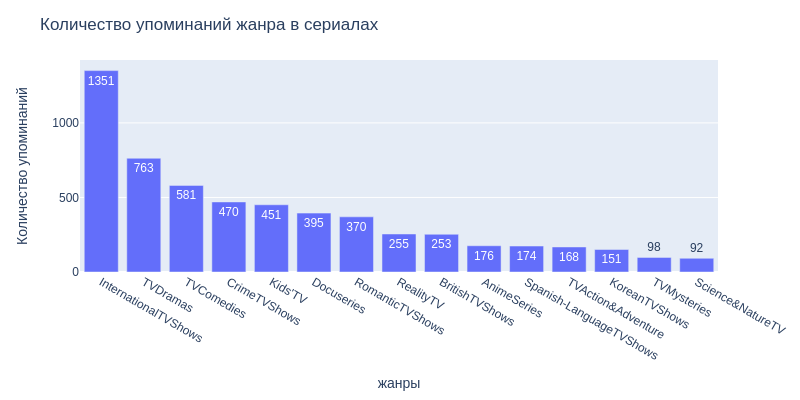

In [46]:
genres_show = get_counts(list(netflix_shows['listed_in']))[:15]
get_graph_counts(genres_show, "Количество упоминаний жанра в сериалах", "жанры", "Количество упоминаний")

по статистике жанров примерно тоже самое что и в фильмах

Анализ продолжительности сериалов

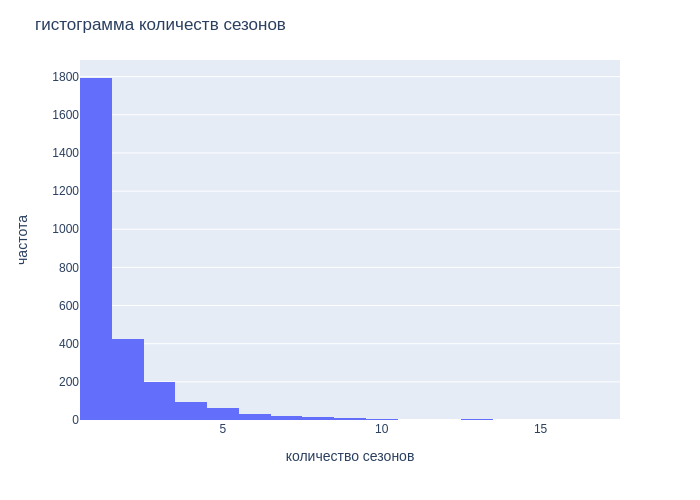

In [47]:
fig = px.histogram(durations['no_of_seasons'], x='no_of_seasons', nbins=20)
fig.update_layout(    
    title="гистограмма количеств сезонов",
    xaxis_title="количество сезонов",
    yaxis_title="частота")
fig.show('png')

подавляющее большинство сериалов выходит одним сезоном. возможно это не очень хорошие сериалы.

#Система рекомендаций

Создадим функцию которая  на основе похожести одного выбранного фильма будет рекомендовать подобные.

Для этого воспользуемся векторизацией tf-idf описаний к фильмам на netflix. Данный векторизатор оценивает встречаемость слов не только в одном объекте, но и по всему переданнному массиву. 

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
#  избавимся от пропусков
netflix_movie['description'] = netflix_movie['description'].fillna('')

In [48]:
netflix_movie['description'].head()

0     As her father nears the end of his life, filmm...
6     Equestria's divided. But a bright-eyed hero be...
7     On a photo shoot in Ghana, an American model s...
9     A woman adjusting to life after a loss contend...
12    After most of her family is murdered in a terr...
Name: description, dtype: object

In [52]:
# инициализируем модель векторизатора и с игнорированием стопслов на английском
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(netflix_movie['description'])
tfidf_matrix.shape

(6131, 15483)

15483 слова из описаний к 6131 фильму

Рассчитывать векторные расстояния между описаний к фильмам будем с помощью косинусной похожести

In [56]:
# загрузим библиотеку для расчетов похожести
from sklearn.metrics.pairwise import cosine_similarity
# передадим в функцию расчета векторизированнную матрицу описаний 
# и сравниваться она будет сама с собой - для расчета похожести именно среди описаний к фильмам на нетфликсе
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)
cosine_sim.shape

(6131, 6131)

In [58]:
# соберем в Серию индексы с названием фильмов
indices = pd.Series(netflix_movie.index, index=netflix_movie['title']).drop_duplicates()
indices.tail()

title
Zinzana       8801
Zodiac        8802
Zombieland    8804
Zoom          8805
Zubaan        8806
dtype: int64

Соберем таблицу с наименованиями в индексах и колонках, и значениями косинусной похожести на пересечениях


In [61]:
cosine_sim_df = pd.DataFrame(cosine_sim)

cosine_sim_df.columns = indices.index

cosine_sim_df['title'] = indices.index
cosine_sim_df = cosine_sim_df.set_index('title')

cosine_sim_df.head()

title,Dick Johnson Is Dead,My Little Pony: A New Generation,Sankofa,The Starling,Je Suis Karl,Confessions of an Invisible Girl,Europe's Most Dangerous Man: Otto Skorzeny in Spain,Intrusion,Avvai Shanmughi,Go! Go! Cory Carson: Chrissy Takes the Wheel,...,Young Tiger,"Yours, Mine and Ours",اشتباك,Zed Plus,Zenda,Zinzana,Zodiac,Zombieland,Zoom,Zubaan
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,1.000000,0.0,0.0,0.018285,0.000000,0.0,0.014848,0.0,0.023927,0.0,...,0.0,0.02889,0.0,0.0,0.0,0.0,0.0,0.000000,0.016245,0.000000
My Little Pony: A New Generation,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
Sankofa,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.029736,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.036504
The Starling,0.018285,0.0,0.0,1.000000,0.029133,0.0,0.016294,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.061674,0.017826,0.045998
Je Suis Karl,0.000000,0.0,0.0,0.029133,1.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.028473


по диагонали единицы так как фильм сравнивается сам с собой - и соответсвенно  полностью похож.

Напишем функцию для получения рекомендаций

In [62]:
def get_recomendations(title, cosine_sim=cosine_sim_df):
    idx = indices[title]
    # получаем похожесть для этого фильма
    sim_scores = list(enumerate(cosine_sim_df.loc[title]))

    # сортируем фильны по похожести к полученному фильму
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # отберем первые 10
    sim_scores = sim_scores[1:11]
    # получаем индексы этих 10 фильмов
    movie_indeces = [i[0] for i in sim_scores]

    return netflix_movie['title'].iloc[movie_indeces]

Рекомендации основанные на сюжете

In [104]:
# выберем фильм на основе которого хотим получить рекомендациюъ

film = netflix_movie['title'].sample().values[0]
film


'Officer Downe'

In [105]:
# посмотрим не его описание
netflix_movie[netflix_movie['title'] == film]['description'].iloc[0]

'Fallen Los Angeles police officer Terrence Downe finds new life as a secret weapon: a scientifically altered super-cop with unlimited lives.'

In [108]:
# получим рекомендуемый фильм
rec = get_recomendations(film).values[0]
rec

'Resident Evil: Afterlife'

In [109]:
#  посмотрим на описание реекомендуемого фильма
netflix_movie[netflix_movie['title'] == rec]['description'].iloc[0]

'The Undead Apocalypse continues as super-soldier Alice finds her way to a supposed sanctuary in Los Angeles, which may just be a deadly trap.'

в описании к фильмам еть некоторая схожесть - упоминание одного города, слово супер и находит, не много - но это наиболее похоже по набору слов в описании.

In [111]:
# посмотрим на значение похожести 
cosine_sim_df[film].sort_values(ascending=False)[:5]

title
Officer Downe               1.000000
Resident Evil: Afterlife    0.180074
Choked: Paisa Bolta Hai     0.154838
Midnight Run                0.152402
Whisky                      0.150333
Name: Officer Downe, dtype: float64